# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [44]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, transform
from skimage.filters import rank
from skimage.morphology import disk, square, rectangle, star, diamond

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization



*   Visualize the created images in a 1 x 3 subplot using matplotlib.


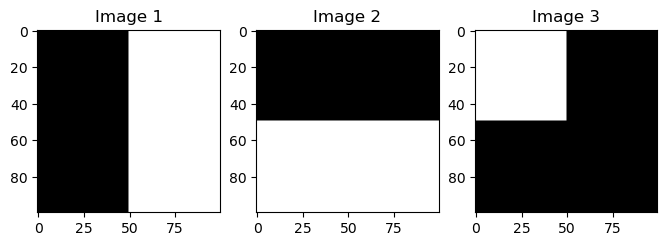

In [13]:
# solution
img1 = np.zeros((100,100), dtype=np.uint8)
img1 [:,50:] = 255

img2 = np.zeros((100,100), dtype=np.uint8)
img2 [50:,:] = 255

img3 = np.zeros((100,100), dtype=np.uint8)
img3 [:50,:50] = 255

fig, axes = plt.subplots(1, 3, figsize=(8, 5))
axes[0].imshow(img1, cmap="gray")
axes[0].set_title("Image 1")
axes[1].imshow(img2, cmap="gray")
axes[1].set_title("Image 2")
axes[2].imshow(img3, cmap="gray")
axes[2].set_title("Image 3")

plt.show()

*   Use the above three images to create the following image


*Hint: Remember channels and color spaces*

<function matplotlib.pyplot.show(close=None, block=None)>

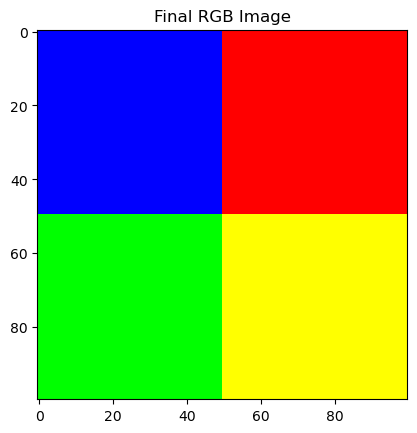

In [6]:
# solution
rgb_img = np.zeros((100,100,3), dtype=np.uint8)

rgb_img[:,:,0] = img1 # Red
rgb_img[:,:,1] = img2 # Green
rgb_img[:,:,2] = img3 # Blue

# Visulization
plt.imshow(rgb_img)
plt.title("Final RGB Image")
plt.show

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder



*   Extract individual channels and plot them using matplotlib subplot.



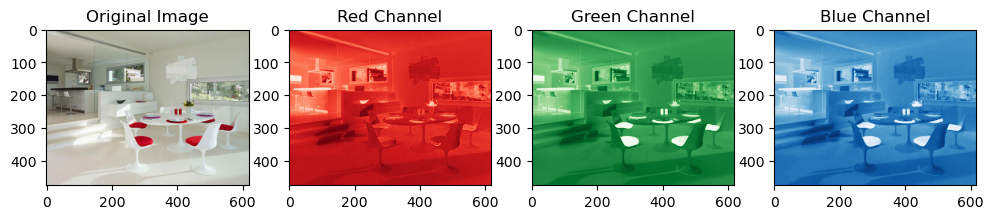

In [16]:
# solution
img_path = "images\sillas.jpg"

img = io.imread(img_path)

red = img[:,:,0] # Red channel
green = img[:,:,1] # Green chaneel
blue = img[:,:,2] # Blue chaneel

fig, axes = plt.subplots(1, 4, figsize=(12, 5))

axes[0].imshow(img)
axes[0].set_title("Original Image")

axes[1].imshow(red, cmap="Reds")
axes[1].set_title("Red Channel")

axes[2].imshow(green, cmap="Greens")
axes[2].set_title("Green Channel")

axes[3].imshow(blue, cmap="Blues")
axes[3].set_title("Blue Channel")

plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

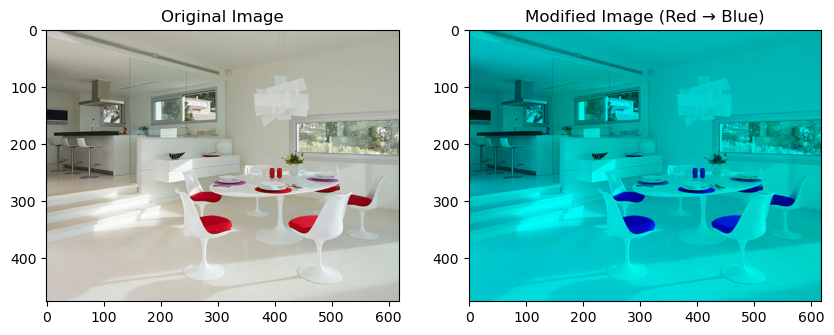

In [20]:
# solution
new_img = img.copy()

new_img[:,:,2] = new_img[:,:,0]
new_img[:,:,0] = 0

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img)
axes[0].set_title("Original Image")

axes[1].imshow(new_img)
axes[1].set_title("Modified Image (Red → Blue)")

plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*



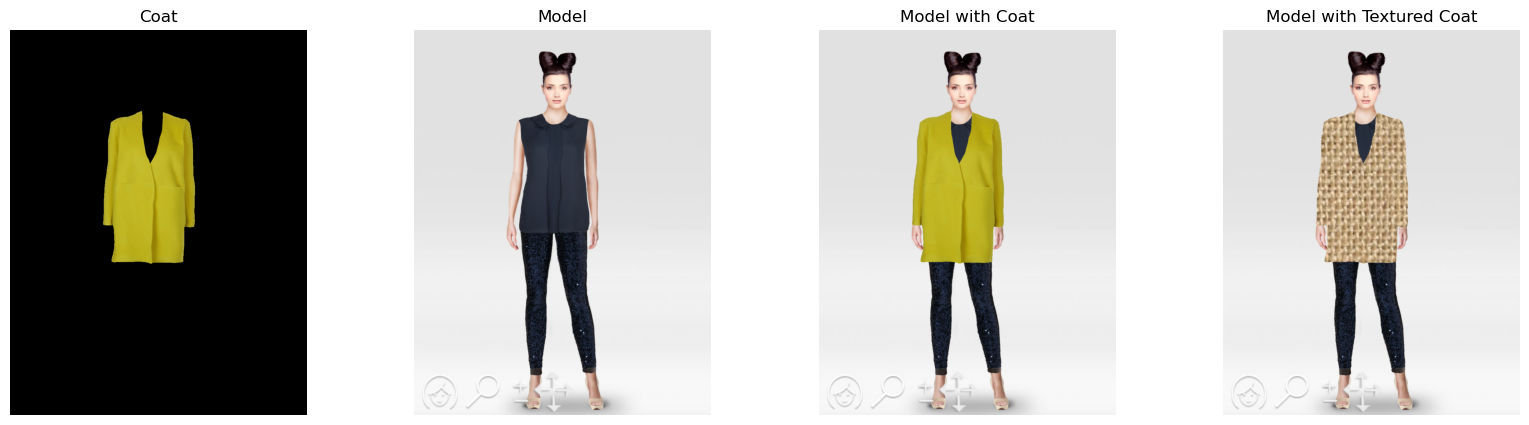

In [35]:
# solution
model_img = io.imread("images/model.png")[..., :3]  
coat_img = io.imread("images/coat.png")[..., :3]
texture_img = io.imread("images/texture3.jpg")[..., :3]

mask = np.mean(coat_img, axis=2) > 50  

model_with_coat = model_img.copy()
model_with_coat[mask] = coat_img[mask]

texture_resized = transform.resize(texture_img, coat_img.shape[:2], anti_aliasing=True)
texture_resized = (texture_resized * 255).astype(np.uint8)

model_with_texture = model_with_coat.copy()
model_with_texture[mask] = texture_resized[mask]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

titles = ["Coat", "Model", "Model with Coat", "Model with Textured Coat"]
images = [coat_img, model_img, model_with_coat, model_with_texture]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




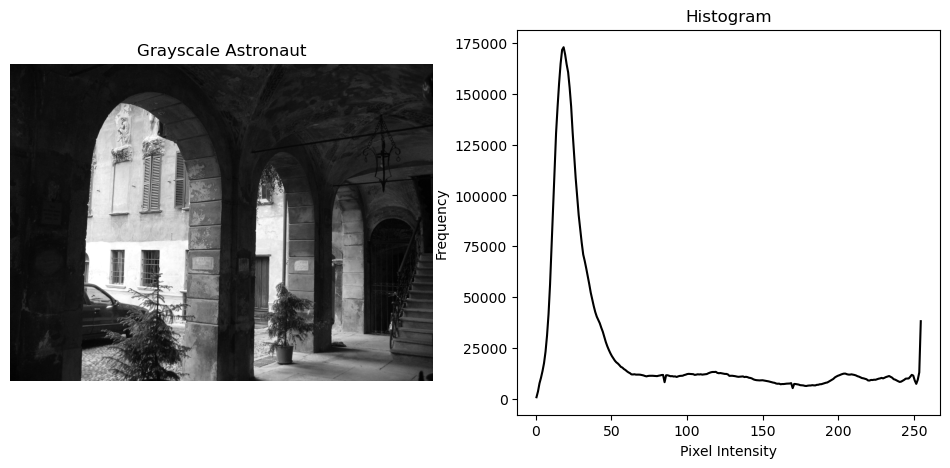

In [38]:
# solution
aquatermi = "images/aquatermi_lowcontrast.jpg"
img = io.imread(aquatermi)

gray = np.mean(img, axis=2)
hist, bins = exposure.histogram(gray)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(gray, cmap="gray")
axes[0].set_title("Grayscale Astronaut")
axes[0].axis("off")

axes[1].plot(bins, hist, color="black")
axes[1].set_title("Histogram")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

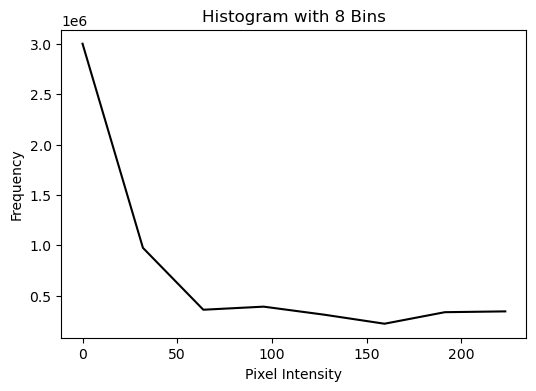

In [39]:
# solution
hist, bins = np.histogram(gray, bins=8)

plt.figure(figsize=(6, 4))
plt.plot(bins[:-1], hist, color="black")  
plt.title("Histogram with 8 Bins")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

**Solutions**

## *   What happens when you change the bin count?

Higher bins = More details, but may look noisy.
Lower bins = Less details, but easier to interpret.

## Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
 Yes, fewer bins lose details, while more bins provide precise distribution.


## *   What happens when the bin count is very low?
Histogram is too simplified, losing important details.

## and what happens when it is very high?
 Too much detail, making it harder to analyze patterns.




*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


c:\Programming\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


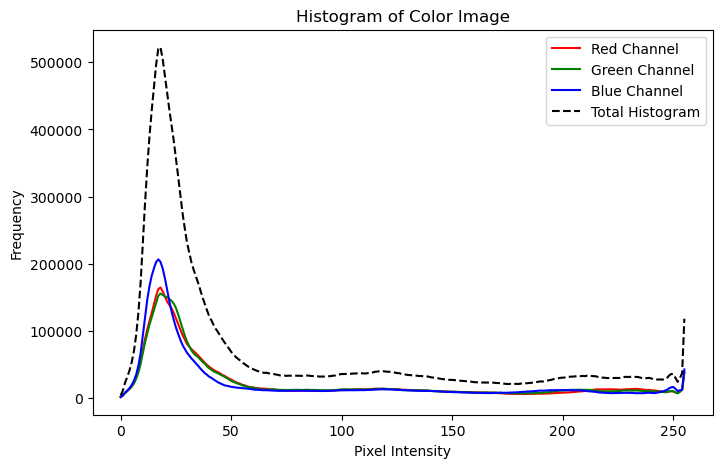

In [40]:
#solution
hist_r, bins_r = exposure.histogram(img[:, :, 0])  # Red chaneel
hist_g, bins_g = exposure.histogram(img[:, :, 1])  # Green chaneel
hist_b, bins_b = exposure.histogram(img[:, :, 2])  # Blue chaneel

hist_total, bins_total = exposure.histogram(img)

plt.figure(figsize=(8, 5))
plt.plot(bins_r, hist_r, color="red", label="Red Channel")
plt.plot(bins_g, hist_g, color="green", label="Green Channel")
plt.plot(bins_b, hist_b, color="blue", label="Blue Channel")
plt.plot(bins_total, hist_total, color="black", linestyle="dashed", label="Total Histogram")

plt.title("Histogram of Color Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



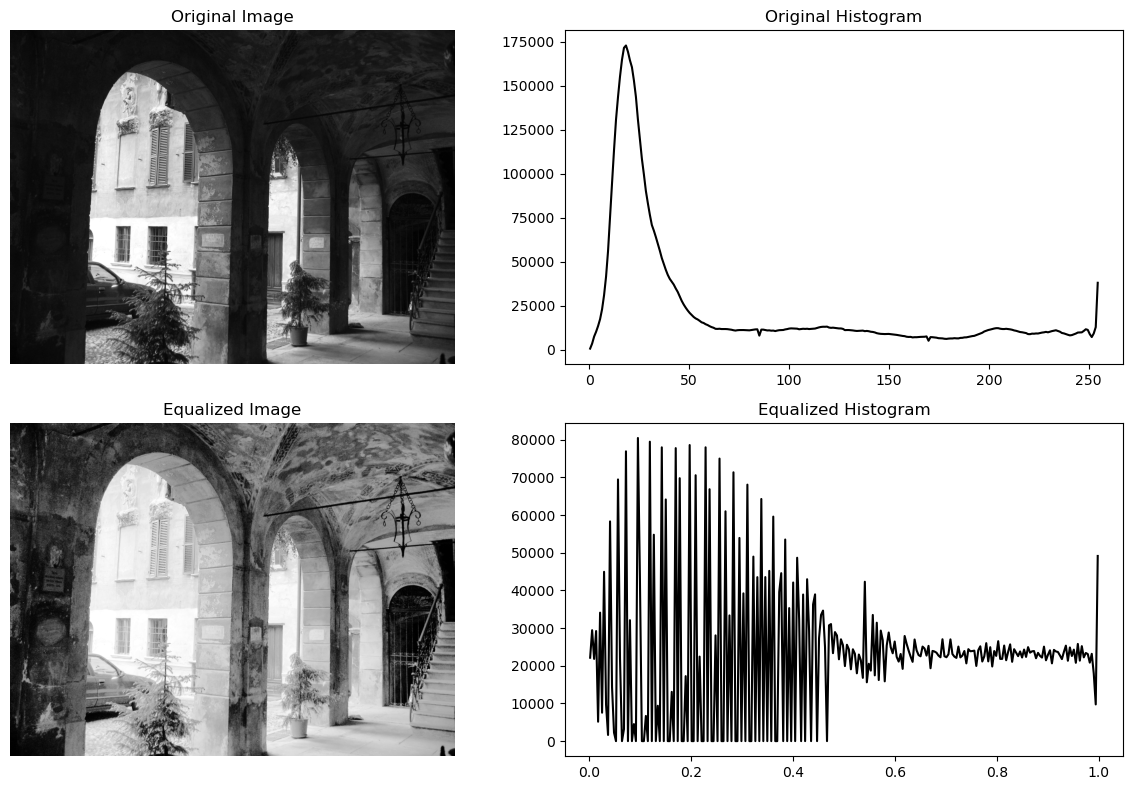

In [ ]:
# solution
img_path = "images/aquatermi_lowcontrast.jpg"
img = io.imread(img_path)

gray = np.mean(img, axis=2)

hist_orig, bins_orig = exposure.histogram(gray)

equalized = exposure.equalize_hist(gray)

hist_eq, bins_eq = exposure.histogram(equalized)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(gray, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].plot(bins_orig, hist_orig, color="black")
axes[0, 1].set_title("Original Histogram")

axes[1, 0].imshow(equalized, cmap="gray")
axes[1, 0].set_title("Equalized Image")
axes[1, 0].axis("off")

axes[1, 1].plot(bins_eq, hist_eq, color="black")
axes[1, 1].set_title("Equalized Histogram")

plt.tight_layout()
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Histogram equalization uses CDF (Cumulative Distribution Function) and interpolation to redistribute pixel intensities, making the contrast more uniform.

Linear contrast stretch simply scales pixel values linearly between the minimum and maximum intensity, without considering the overall distribution.

Equalization is better for enhancing details in low-contrast images! 
...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



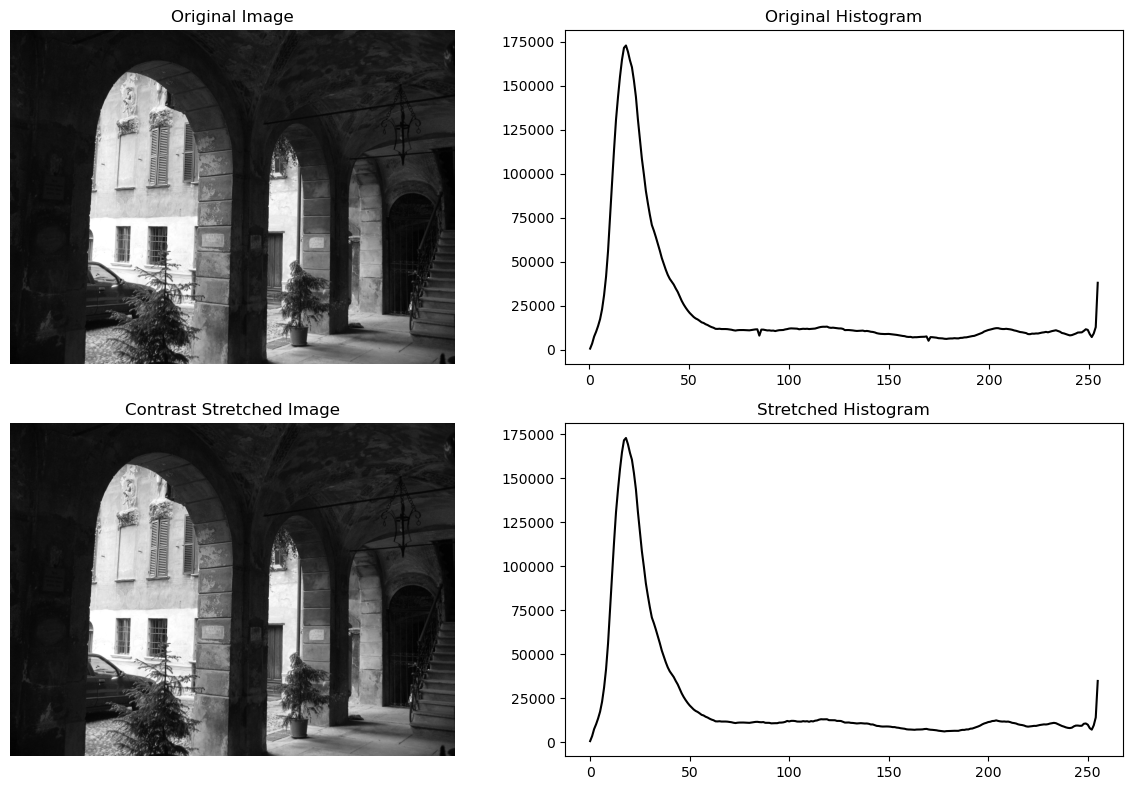

In [42]:
# solution
def linear_contrast_stretch(img, bins=256):
    min_val, max_val = np.min(img), np.max(img)
    stretched = (img - min_val) / (max_val - min_val) * 255
    return stretched.astype(np.uint8)

img_path = "images/aquatermi_lowcontrast.jpg"
img = io.imread(img_path)
gray = np.mean(img, axis=2)

stretched_img = linear_contrast_stretch(gray)

hist_orig, bins_orig = exposure.histogram(gray)
hist_stretched, bins_stretched = exposure.histogram(stretched_img)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(gray, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].plot(bins_orig, hist_orig, color="black")
axes[0, 1].set_title("Original Histogram")

axes[1, 0].imshow(stretched_img, cmap="gray")
axes[1, 0].set_title("Contrast Stretched Image")
axes[1, 0].axis("off")

axes[1, 1].plot(bins_stretched, hist_stretched, color="black")
axes[1, 1].set_title("Stretched Histogram")

plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




C:\Users\shosh\AppData\Local\Temp\ipykernel_60648\2010623129.py:8: FutureWarning: `selem` is a deprecated argument name for `mean`. It will be removed in version 1.0. Please use `footprint` instead.
  mean_20 = rank.mean(img, selem=selem_20)
C:\Users\shosh\AppData\Local\Temp\ipykernel_60648\2010623129.py:9: FutureWarning: `selem` is a deprecated argument name for `mean`. It will be removed in version 1.0. Please use `footprint` instead.
  mean_30 = rank.mean(img, selem=selem_30)
C:\Users\shosh\AppData\Local\Temp\ipykernel_60648\2010623129.py:10: FutureWarning: `selem` is a deprecated argument name for `mean`. It will be removed in version 1.0. Please use `footprint` instead.
  mean_10 = rank.mean(img, selem=selem_10)


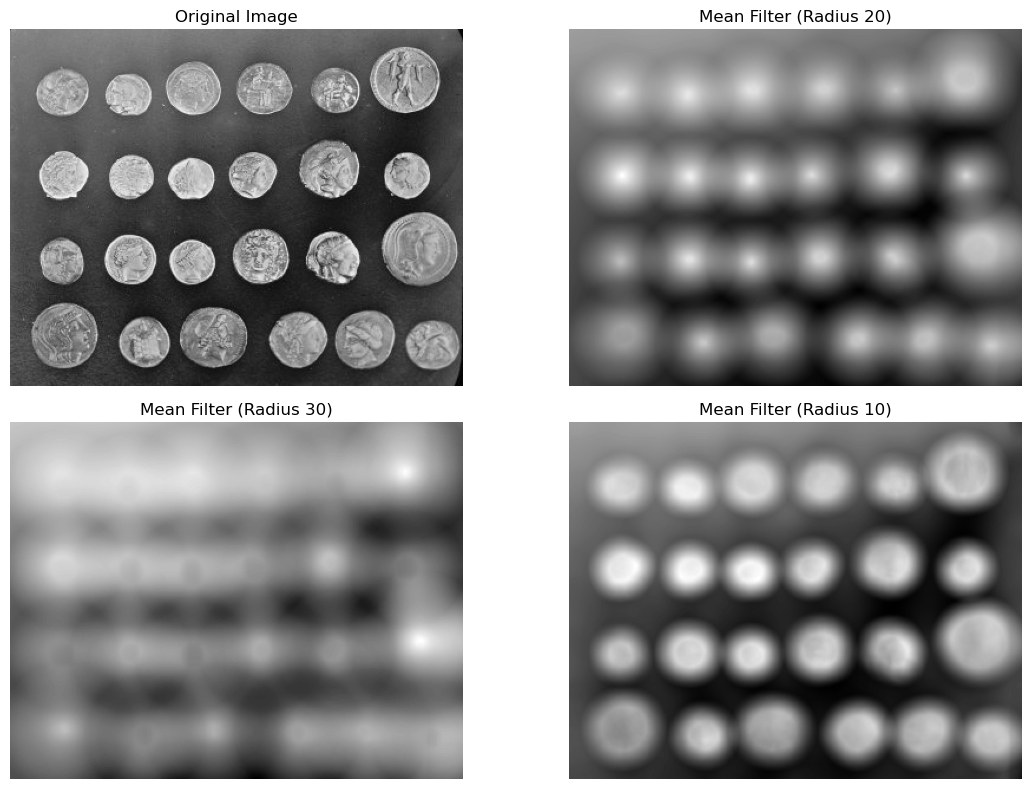

In [45]:
# solution
img = data.coins()

selem_20 = disk(20)
selem_30 = disk(30)
selem_10 = disk(10)

mean_20 = rank.mean(img, selem=selem_20)
mean_30 = rank.mean(img, selem=selem_30)
mean_10 = rank.mean(img, selem=selem_10)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(img, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(mean_20, cmap="gray")
axes[0, 1].set_title("Mean Filter (Radius 20)")
axes[0, 1].axis("off")

axes[1, 0].imshow(mean_30, cmap="gray")
axes[1, 0].set_title("Mean Filter (Radius 30)")
axes[1, 0].axis("off")

axes[1, 1].imshow(mean_10, cmap="gray")
axes[1, 1].set_title("Mean Filter (Radius 10)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

C:\Users\shosh\AppData\Local\Temp\ipykernel_60648\3034413990.py:18: FutureWarning: `selem` is a deprecated argument name for `mean`. It will be removed in version 1.0. Please use `footprint` instead.
  filtered = rank.mean(img, selem=selem)


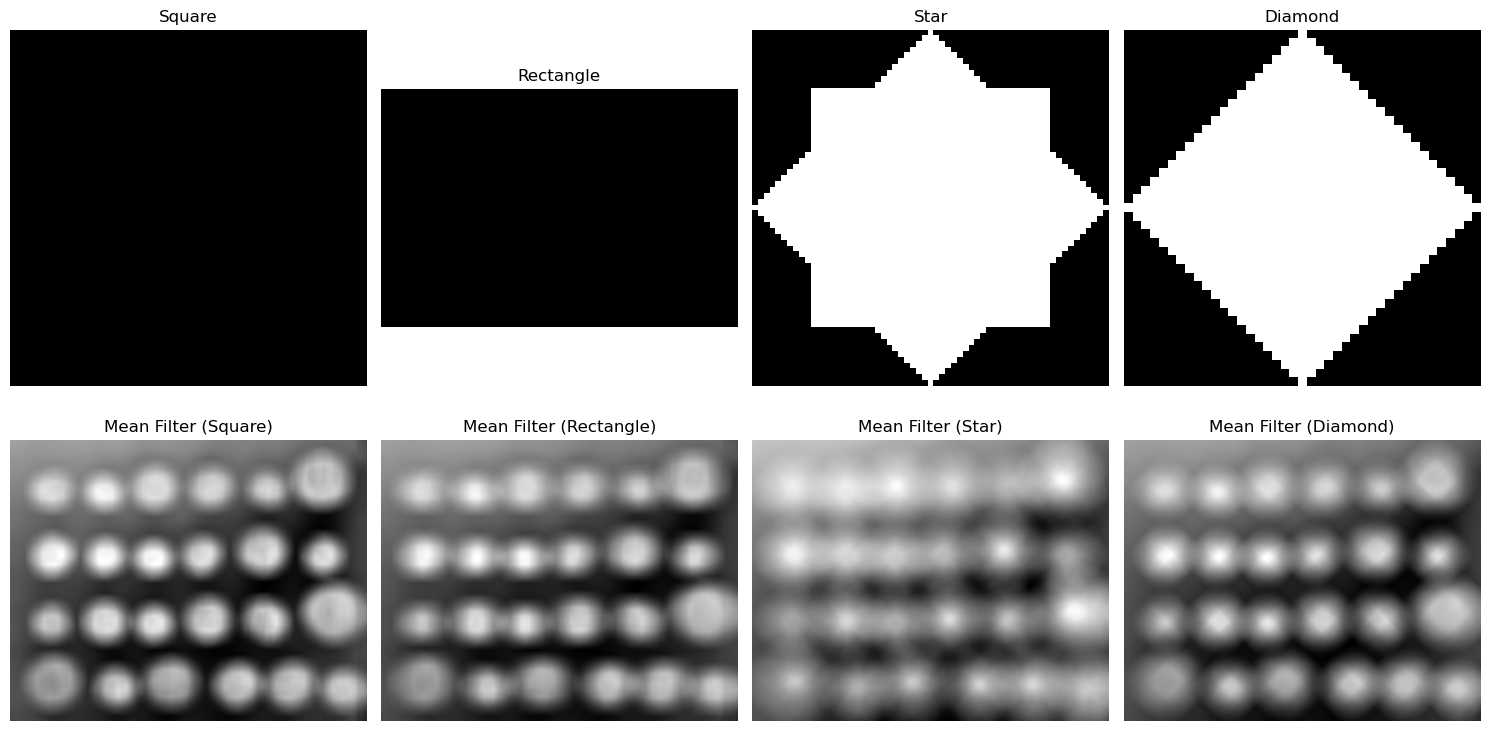

In [46]:
# solution
img = data.coins()

selems = {
    "Square": square(20),
    "Rectangle": rectangle(20, 30),
    "Star": star(20),
    "Diamond": diamond(20)
}

fig, axes = plt.subplots(2, len(selems), figsize=(15, 8))

for i, (name, selem) in enumerate(selems.items()):
    axes[0, i].imshow(selem, cmap="gray")
    axes[0, i].set_title(name)
    axes[0, i].axis("off")

    filtered = rank.mean(img, selem=selem)
    axes[1, i].imshow(filtered, cmap="gray")
    axes[1, i].set_title(f"Mean Filter ({name})")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**
Larger radius → More smoothing, but details may be lost.
Smaller radius → Less smoothing, preserving more details.
Big radius: Blurs edges and removes noise better.

Small radius: Keeps fine details but less noise reduction.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Different structuring elements (selem) affect how smoothing is applied.
Square & Rectangle → More uniform smoothing, preserves straight edges.
Star & Diamond → Smoother on diagonal and curved edges.
Round shapes (disk) → Balanced smoothing in all directions.

Each shape impacts edges, corners, and textures differently.




*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

1️- Difference between Mean Filter & Gaussian Filter:

Mean Filter: Averages pixel values within a window, leading to uniform blurring.
Gaussian Filter: Applies weighted averaging with a Gaussian function, preserving edges better.

2️- Where to Use Each Filter?

Mean Filter: Used for removing salt-and-pepper noise but can blur edges.
Gaussian Filter: Used for general smoothing and noise reduction while maintaining edges.

Gaussian filter is usually preferred for better edge preservation.